In [ ]:
from PIL import Image
import os

def ensure_directory_exists(directory_path):
    """Ensure the target directory exists, create it if it doesn't."""
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)

def convert_png_images_to_grayscale_and_save(input_directory, output_directory_base):
    for root, dirs, files in os.walk(input_directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                try:
                    # Construct the path to the input image
                    image_path = os.path.join(root, file)
                    image = Image.open(image_path).convert('L')  # Convert image to grayscale

                    # Construct a corresponding output path that mirrors the input directory structure
                    relative_path = os.path.relpath(root, input_directory)
                    output_directory = os.path.join(output_directory_base, relative_path)
                    ensure_directory_exists(output_directory)

                    # Save the grayscale image in the corresponding output directory
                    gray_image_path = os.path.join(output_directory, file)
                    image.save(gray_image_path)
                    print(f"Converted and saved: {gray_image_path}")
                except Exception as e:
                    print(f"Error processing {file}: {e}")

# Define input paths
training_set_path = r'C:\Users\Zhengqi Wang\Desktop\NYU\2024 Spring\301DL\Project\dataset\training_set'
validation_set_path = r'C:\Users\Zhengqi Wang\Desktop\NYU\2024 Spring\301DL\Project\dataset\validation_set'

# Define base output paths for the grayscale images
# Grayscale images will be saved in a structure that mirrors the input directories
output_base_training_set_path = r'C:\Users\Zhengqi Wang\Desktop\NYU\2024 Spring\301DL\Project\dataset\gray_training_set'
output_base_validation_set_path = r'C:\Users\Zhengqi Wang\Desktop\NYU\2024 Spring\301DL\Project\dataset\gray_validation_set'

# Convert .png images in all directories and subdirectories to grayscale
convert_png_images_to_grayscale_and_save(training_set_path, output_base_training_set_path)
convert_png_images_to_grayscale_and_save(validation_set_path, output_base_validation_set_path)

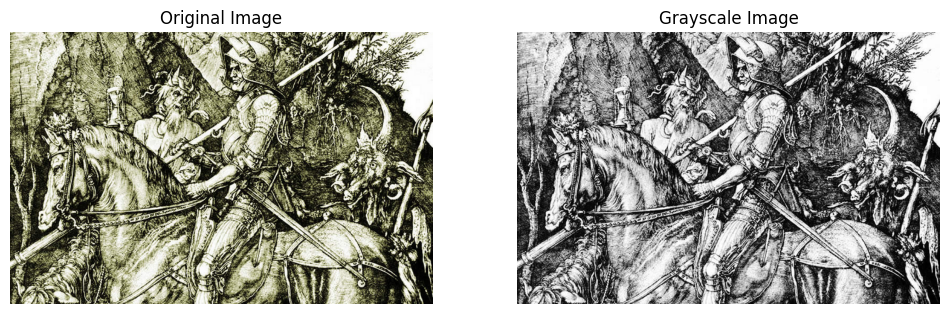

In [5]:
import os
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

def load_image_as_tensor(image_path):
    """Load an image and convert it to a PyTorch tensor."""
    image = Image.open(image_path)
    transform = transforms.ToTensor()
    return transform(image)

def show_images(original_tensor, grayscale_tensor):
    """Display the original and grayscale images side by side."""
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(original_tensor.permute(1, 2, 0))
    ax[0].set_title("Original Image")
    ax[0].axis('off')

    ax[1].imshow(grayscale_tensor.squeeze(), cmap='gray')
    ax[1].set_title("Grayscale Image")
    ax[1].axis('off')

    plt.show()

def process_directory(directory_path, output_directory_base):
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.lower().endswith('.png'):
                original_image_path = os.path.join(root, file)

                # Assuming grayscale images are saved in a mirrored directory structure
                relative_path = os.path.relpath(root, directory_path)
                grayscale_image_path = os.path.join(output_directory_base, relative_path, file)

                if os.path.exists(grayscale_image_path):  # Check if the grayscale image exists
                    # Load images as PyTorch tensors
                    original_tensor = load_image_as_tensor(original_image_path)
                    grayscale_tensor = load_image_as_tensor(grayscale_image_path)

                    # Show the images
                    show_images(original_tensor, grayscale_tensor)

                return  # Process only one image per directory

# Define the paths
directory_path = r'C:\Users\Zhengqi Wang\Desktop\NYU\2024 Spring\301DL\Project\dataset\training_set'  # Update this path
output_directory_base = r'C:\Users\Zhengqi Wang\Desktop\NYU\2024 Spring\301DL\Project\dataset\gray_training_set'  # Update this path

# Process one image from each directory
process_directory(directory_path, output_directory_base)

In [3]:
import os
from collections import defaultdict

def count_files_and_types(directory):
    # This dictionary will hold folder names as keys and another dictionary as values
    # The inner dictionary will have file types as keys and their counts as values
    folder_file_types = {}

    # Iterate over all items in the given directory
    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)

        # Check if this item is a directory
        if os.path.isdir(item_path):
            # Create a default dictionary for counting file types
            file_types = defaultdict(int)

            # Iterate over all items in this subdirectory
            for subitem in os.listdir(item_path):
                subitem_path = os.path.join(item_path, subitem)
                # Check if the subitem is a file (ignoring subdirectories)
                if os.path.isfile(subitem_path):
                    # Extract the file extension and update the count
                    _, ext = os.path.splitext(subitem)
                    file_types[ext] += 1

            # Add the counts to the main dictionary
            folder_file_types[item] = dict(file_types)

    return folder_file_types

# Example usage
directory = r'C:\Users\Zhengqi Wang\Desktop\NYU\2024 Spring\301DL\Project\dataset\gray_validation_set'
file_types_counts = count_files_and_types(directory)
for folder, types in file_types_counts.items():
    print(f"Folder '{folder}' contains the following file types and counts:")
    for file_type, count in types.items():
        # Print the file type (or 'No Extension' if empty) and its count
        print(f"  {file_type if file_type else 'No Extension'}: {count}")

Folder 'drawings' contains the following file types and counts:
  .jpg: 5
  .jpeg: 117
Folder 'engraving' contains the following file types and counts:
  .jpg: 26
  .jpeg: 58
Folder 'iconography' contains the following file types and counts:
  .png: 2
  .jpeg: 178
  .jpg: 51
Folder 'painting' contains the following file types and counts:
  .jpg: 228
Folder 'sculpture' contains the following file types and counts:
  .jpg: 42
  .png: 4
  .jpeg: 145


In [4]:
import os
from collections import defaultdict

def count_files_and_types(directory):
    # This dictionary will hold folder names as keys and another dictionary as values
    # The inner dictionary will have file types as keys and their counts as values
    folder_file_types = {}

    # Iterate over all items in the given directory
    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)

        # Check if this item is a directory
        if os.path.isdir(item_path):
            # Create a default dictionary for counting file types
            file_types = defaultdict(int)

            # Iterate over all items in this subdirectory
            for subitem in os.listdir(item_path):
                subitem_path = os.path.join(item_path, subitem)
                # Check if the subitem is a file (ignoring subdirectories)
                if os.path.isfile(subitem_path):
                    # Extract the file extension and update the count
                    _, ext = os.path.splitext(subitem)
                    file_types[ext] += 1

            # Add the counts to the main dictionary
            folder_file_types[item] = dict(file_types)

    return folder_file_types

# Example usage
directory = r'C:\Users\Zhengqi Wang\Desktop\NYU\2024 Spring\301DL\Project\dataset\validation_set'
file_types_counts = count_files_and_types(directory)
for folder, types in file_types_counts.items():
    print(f"Folder '{folder}' contains the following file types and counts:")
    for file_type, count in types.items():
        # Print the file type (or 'No Extension' if empty) and its count
        print(f"  {file_type if file_type else 'No Extension'}: {count}")


Folder 'drawings' contains the following file types and counts:
  .jpg: 5
  .jpeg: 117
Folder 'engraving' contains the following file types and counts:
  .jpg: 26
  .jpeg: 58
Folder 'iconography' contains the following file types and counts:
  .png: 2
  .jpeg: 178
  .jpg: 51
Folder 'painting' contains the following file types and counts:
  .jpg: 228
Folder 'sculpture' contains the following file types and counts:
  .jpg: 42
  .png: 4
  .jpeg: 145
